Задание. Изучить применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации.

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
data = pd.read_csv('adult.csv', na_values=['?'])
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


Датасет содержит информацию об уровне обучения, занимаемой должности, возрасте, доходе людей.

При первичном просмотре данных было обнаружено, что пропуски обозначены символом "?", поэтому при чтении датасета указывается, что значению NaN соответствует "?".

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Всего в таблице 48842 строк, при этом пропуски содержат столбцы workclass, occupation, native-country.
Удаляем строки, где имеются пропущенные значения:

In [ ]:
data = data[~(data['workclass'].isna())]
data = data[~(data['occupation'].isna())]
data = data[~(data['native-country'].isna())]

In [ ]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


Получаем 45222 строки, где во всех столбцах присутствует информация.

Построим график столбчатой диаграммы с накоплением, показывающий влияние уровня образования на получения бОльшего дохода.

In [ ]:
data_50k = data[(data['income'] == '>50K')]['education'].value_counts().sort_values(ascending=False)
data_50k

education
Bachelors       3178
HS-grad         2416
Some-college    1990
Masters         1393
Prof-school      592
Assoc-voc        504
Doctorate        399
Assoc-acdm       398
11th              89
10th              82
7th-8th           55
12th              43
9th               38
5th-6th           22
1st-4th            8
Preschool          1
Name: count, dtype: int64

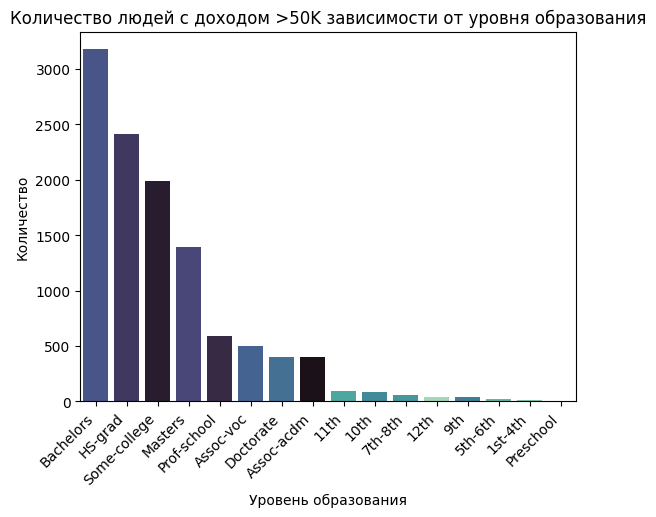

In [ ]:
order = data_50k.index
sns.countplot(data=data[(data['income'] == '<=50K')], x="education", hue="education", palette= "mako", order=order)
plt.title("Количество людей с доходом >50K зависимости от уровня образования")
plt.ylabel("Количество")
plt.xlabel("Уровень образования")
plt.xticks(rotation=45, ha='right')
plt.show()
#ax.bar(labels, android_users, width, label='Android')

На графике наглядно видно, что бОльшее количество людей имеют доход >50К с бакалаврской степенью и окончившие только школу, и единицы имеют такой доход, не окончив даже среднюю школу.

Построим график количества людей, принадлежащих к определенному рабочему классу, по уровню их дохода

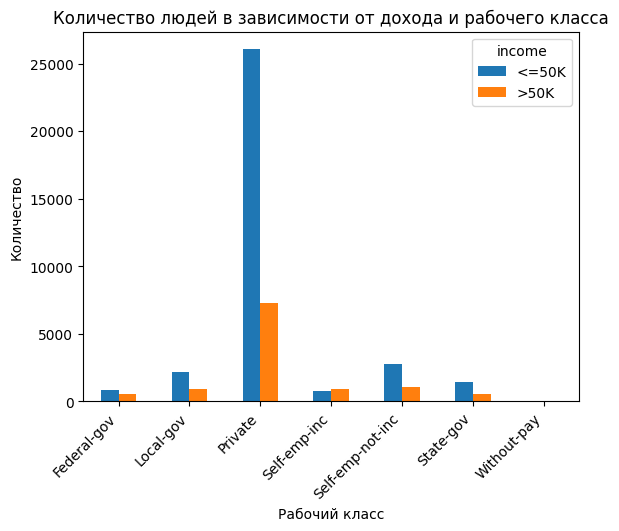

In [ ]:
income_data = data.groupby(['workclass', 'income']).size().unstack()
income_data.plot(kind='bar')
plt.title("Количество людей в зависимости от дохода и рабочего класса")
plt.ylabel("Количество")
plt.xlabel("Рабочий класс")
plt.xticks(rotation=45, ha='right')
plt.show()

По графику можно сделать вывод о том, что самым многочисленным является класс людей, работающих в частных компаниях, там же наибольшее количество людей, имеющих доход >50К. Также только в категории самозанятых количество людей с доходом >50К больше, чем количество людей с доходом <=50К



---



**Построение модели логистической регрессии.**

В качестве категориальных признаков будут использоваться: age, workclass, education, occupation, relationship, race, gender, hours-per-week. Выбор обусловлен следующими гипотезами:
*   age — чем старше человек, тем больше у него опыта и выше доход;
*   workclass — доход зависит от принадлежности человека к определенному рабочему классу;
*   education — при наличии высшего образования выше вероятность иметь лучший доход;
*   occupation — доход зависит от занимаемой должности;
*   relationship — наличие/отсутствие семьи также влияет на уровень дохода (если человек холостой, то гипотетически у него больше времени на построение карьеры, или же если у человека есть семья, то у него больше мотивации хорошо зарабатывать);
*   race, gender — всё еще часто гендер и раса влияют на уровень дохода человека;
*   hours-per-week — доход зависит от количества часов, проведенных на работе.

In [ ]:
selected = data[['age', 'workclass', 'education', 'occupation', 'relationship', 'race', 'gender', 'hours-per-week']]
selected.head()

,age,workclass,education,occupation,relationship,race,gender,hours-per-week
0,25,Private,11th,Machine-op-inspct,Own-child,Black,Male,40
1,38,Private,HS-grad,Farming-fishing,Husband,White,Male,50
2,28,Local-gov,Assoc-acdm,Protective-serv,Husband,White,Male,40
3,44,Private,Some-college,Machine-op-inspct,Husband,Black,Male,40
5,34,Private,10th,Other-service,Not-in-family,White,Male,30


Преобразуем категориальные переменные в числа. Из выбранных переменных только age и hours-per-week являются изначально числовыми.

In [ ]:
X = pd.get_dummies(selected, columns=['workclass', 'education', 'occupation', 'relationship', 'race', 'gender'], dtype='int')
X.head()

,age,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male
0,25,40,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,38,50,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,28,40,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,44,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,34,30,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
le = LabelEncoder()
le.fit(data['income'])

LabelEncoder()

In [ ]:
y = pd.Series(data=le.transform(data['income']))
y

0        0
1        0
2        1
3        1
4        0
        ..
45217    0
45218    1
45219    0
45220    0
45221    1
Length: 45222, dtype: int64

In [ ]:
model = make_pipeline(StandardScaler(), LogisticRegression())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
predictions[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
model.predict_proba(X_test)

array([[0.99803735, 0.00196265],
       [0.89881287, 0.10118713],
       [0.54977176, 0.45022824],
       ...,
       [0.75746495, 0.24253505],
       [0.77940606, 0.22059394],
       [0.97974837, 0.02025163]])

In [ ]:
print(f'Точность предсказания модели логистической регрессии на обучающей выборке = {model.score(X_train, y_train)}\nТочность предсказания модели логистической регрессии на тестовой выборке = {model.score(X_test, y_test) }')

Точность предсказания модели логистической регрессии на обучающей выборке = 0.8308593857976062
Точность предсказания модели логистической регрессии на тестовой выборке = 0.831951354339414


Получена модель логистической регрессии с точностью предсказания 0,83. Показатели точности на обучающей выборке меньше примерно на одну тысячную показателя точности тестовой выборки.



---



**Построение модели методом опорных векторов.**

In [ ]:
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [ ]:
print(f'Точность предсказания модели методом опорных векторов на обучающей выборке = {clf.score(X_train, y_train)}\nТочность предсказания модели методом опорных векторов на тестовой выборке = {clf.score(X_test, y_test) }')

Точность предсказания модели методом опорных векторов на обучающей выборке = 0.8365536114105647
Точность предсказания модели методом опорных векторов на тестовой выборке = 0.8341625207296849


Получена модель методом опорных векторов с точностью предсказания 0,83. Показатели точности на обучающей выборке больше на две тысячных показателя точности тестовой выборки.

Построение моделей было проведено при помощи:
1. определения и преобразования в числовые переменные категориальных признаков и целевой переменной;
2. масштабирования данных;
3. разделения данных на обучающую и тестовую выборки;
4. обучения модели логистической регрессии и модели методом опорных векторов.

Построив 2 модели можно сделать вывод о том, что точности у них в данном случае практически одинаковы, построенная модель методом опорных векторов точнее на тысячные значения.

В результате получили 2 модели, которые с точностью 83% прогнозируют уровень дохода человека.